## Student Performance Indicator(EDA) 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Read CSV

In [3]:
df = pd.read_csv("../data/StudentsPerformance.csv")

### Show top 5 data

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Check duplicate values

In [6]:
df.duplicated().sum()


0

### Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### check number of unique values in each columns

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of the dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [10]:
print("Categories in 'gender' variable: ", end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' varibale: ", end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course ' varibale: ", end=" ")
print(df["test preparation course"].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' varibale:  ['standard' 'free/reduced']
Categories in 'test preparation course ' varibale:  ['none' 'completed']


In [11]:
# define numerical and categorical feature
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# print columns
print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical feature : {categorical_features}")

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding Total score and average score

In [12]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average score"] = df["total score"]/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df["reading score"] == 100]["reading score"].count()
writing_full = df[df["writing score"] == 100]["writing score"].count()
math_full = df[df["math score"] == 100]["math score"].count()

print(f"number of student who got full marks in reading  = {reading_full}")
print(f"number of student who got full marks in writing = {writing_full}")
print(f"number of student who got full marks in math  = {math_full}")

number of student who got full marks in reading  = 17
number of student who got full marks in writing = 14
number of student who got full marks in math  = 7


In [14]:
reading_less = df[df["reading score"] <= 20]["reading score"].count()
writing_less = df[df["writing score"] <= 20]["writing score"].count()
math_less = df[df["math score"] <= 20]["math score"].count()

print(f"number of student who got less marks in reading  = {reading_less}")
print(f"number of student who got less marks in writing = {writing_less}")
print(f"number of student who got less marks in math  = {math_less}")

number of student who got less marks in reading  = 1
number of student who got less marks in writing = 3
number of student who got less marks in math  = 4


### histogram and KDE

### Gender(average score)

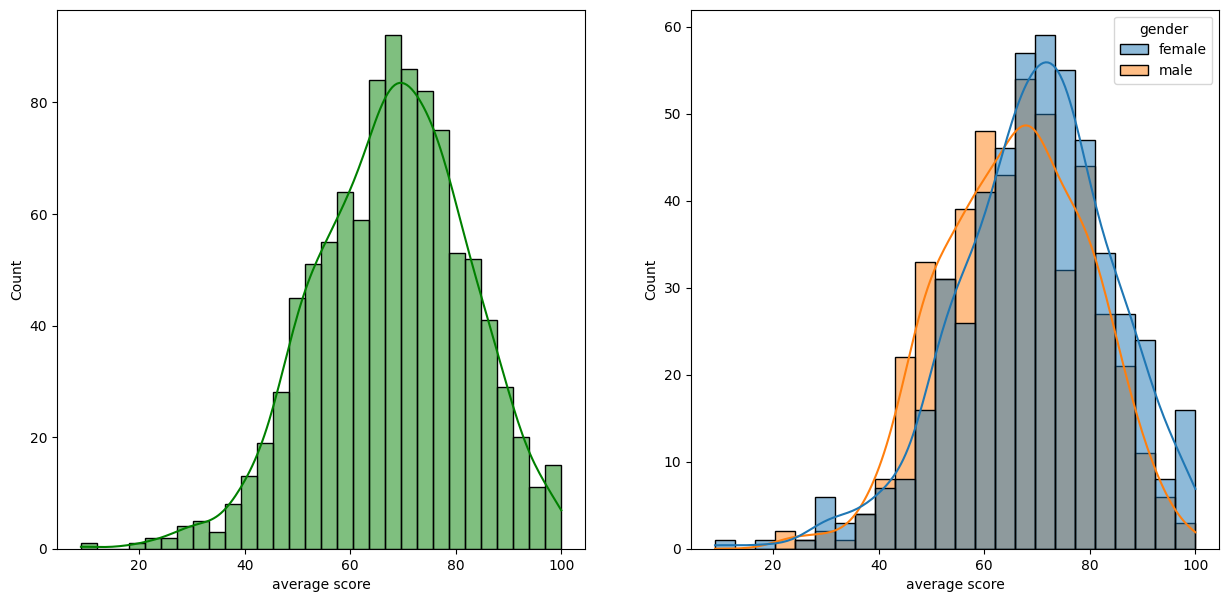

In [15]:
figs, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x="average score", bins= 30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="average score", kde=True, hue="gender")
plt.show()

### Gender(total score)

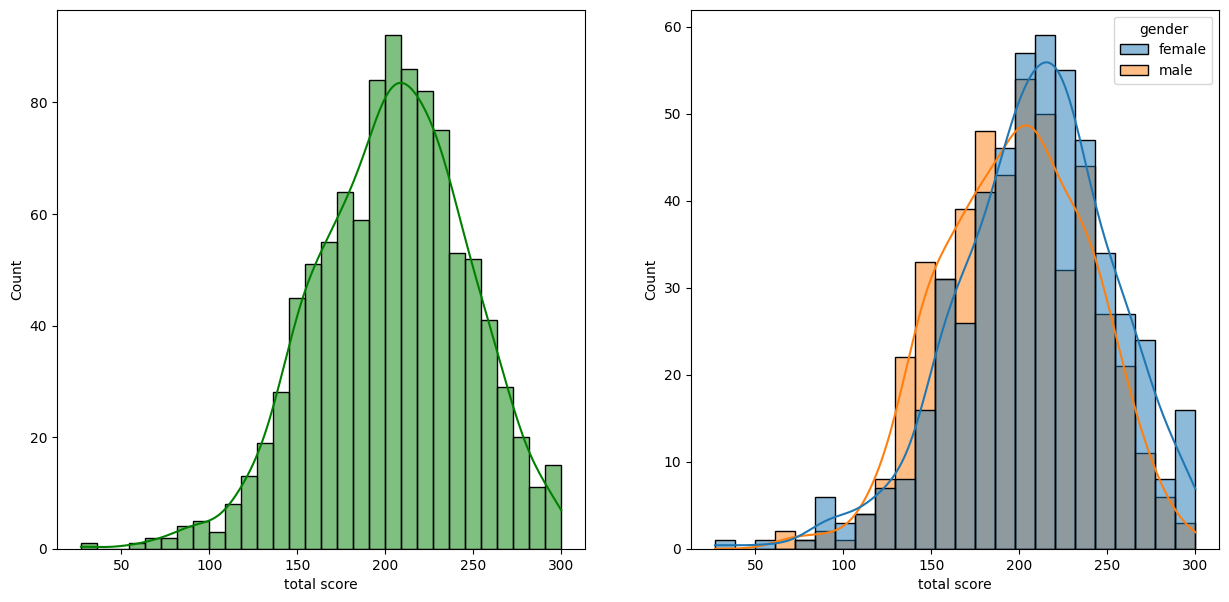

In [16]:
figs, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x="total score", bins= 30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="total score", kde=True, hue="gender")
plt.show()

### lunch(with gender)

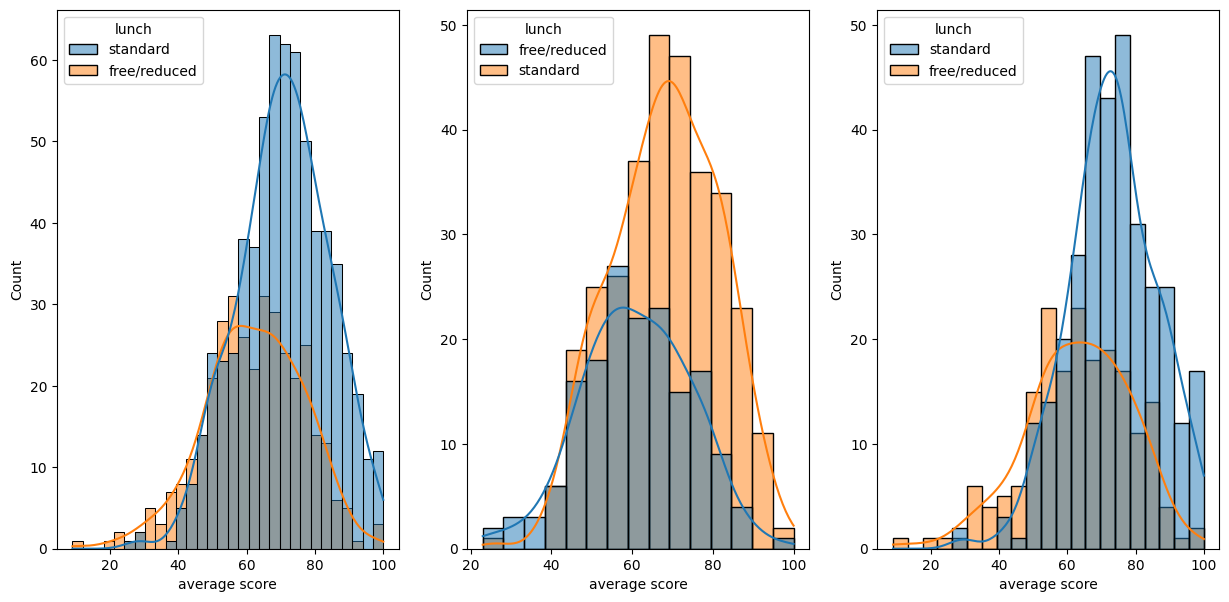

In [17]:
figs, axs = plt.subplots(1, 3, figsize = (15,7))
plt.subplot(131)
sns.histplot(data=df, x="average score", bins= 30, kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"] == "male"], x="average score", kde=True, hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df["gender"] == "female"], x="average score", kde=True, hue="lunch")
plt.show()

### parental level of education(with gender and average score)

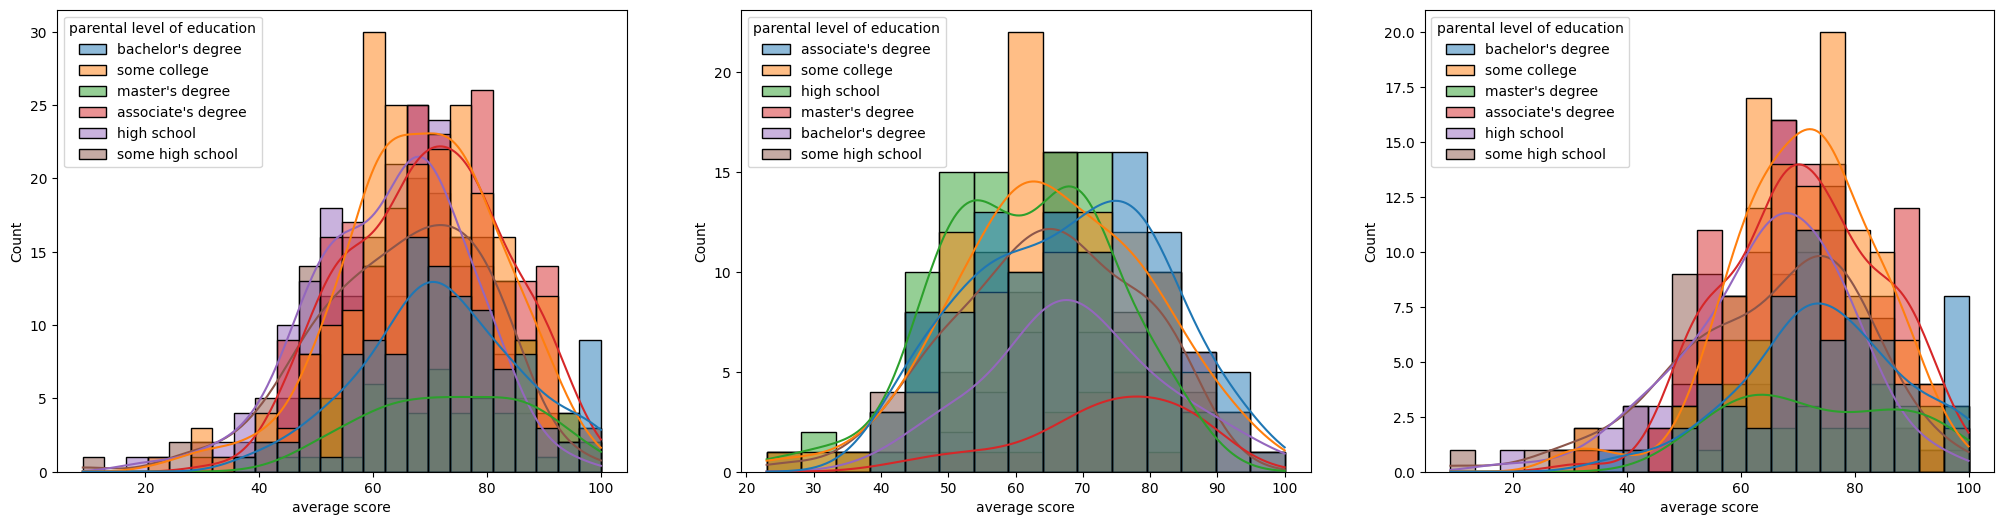

In [21]:
figs, axs= plt.subplots(1,3, figsize = (25,6))
plt.subplot(131)
sns.histplot(data=df, x= "average score", kde= True, hue="parental level of education")
plt.subplot(132)
sns.histplot(data=df[df.gender == "male"], x= "average score", kde= True, hue="parental level of education")
plt.subplot(133)
sns.histplot(data=df[df.gender == "female"], x= "average score", kde= True, hue="parental level of education")
plt.show()

### race/ethnicity(with gender and average score)

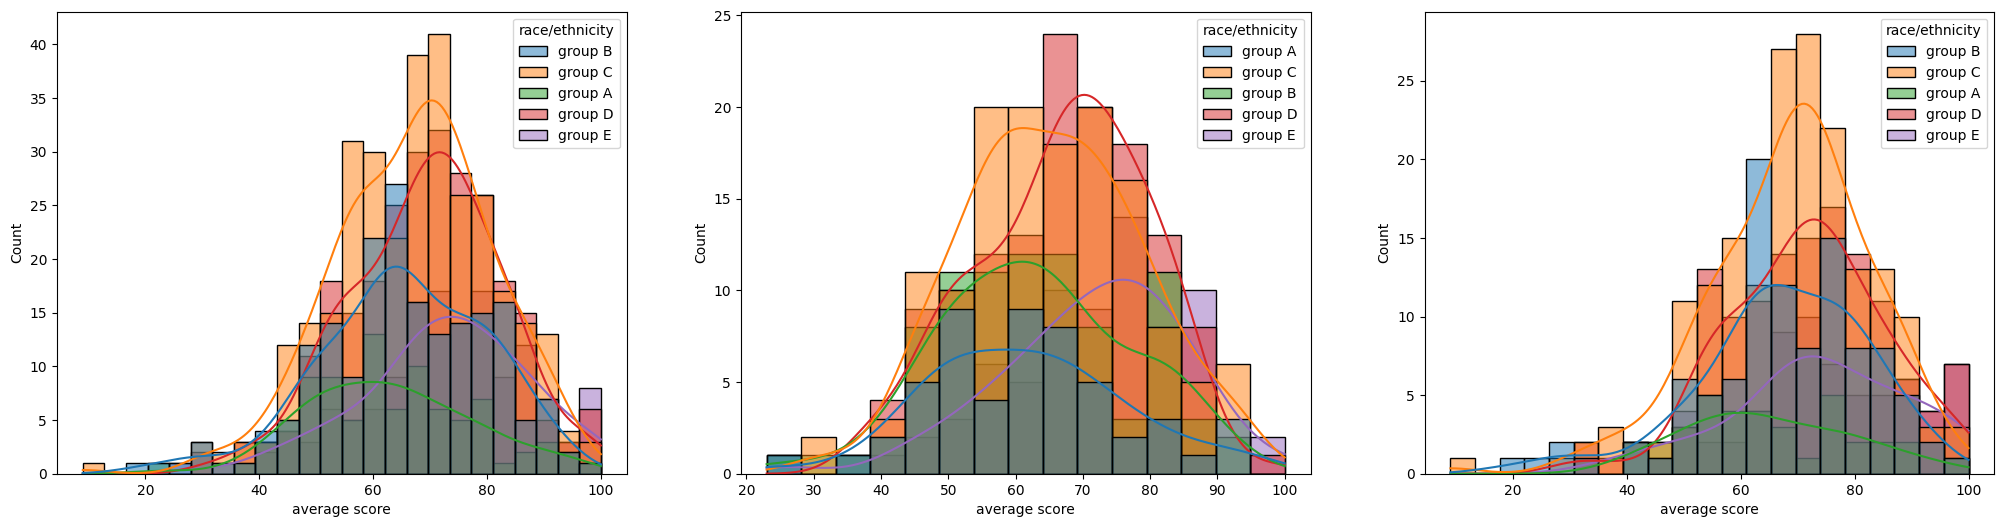

In [22]:
figs, axs= plt.subplots(1,3, figsize = (25,6))
plt.subplot(131)
sns.histplot(data=df, x= "average score", kde= True, hue="race/ethnicity")
plt.subplot(132)
sns.histplot(data=df[df.gender == "male"], x= "average score", kde= True, hue="race/ethnicity")
plt.subplot(133)
sns.histplot(data=df[df.gender == "female"], x= "average score", kde= True, hue="race/ethnicity")
plt.show()

### Maximumum score of students in all three subjects

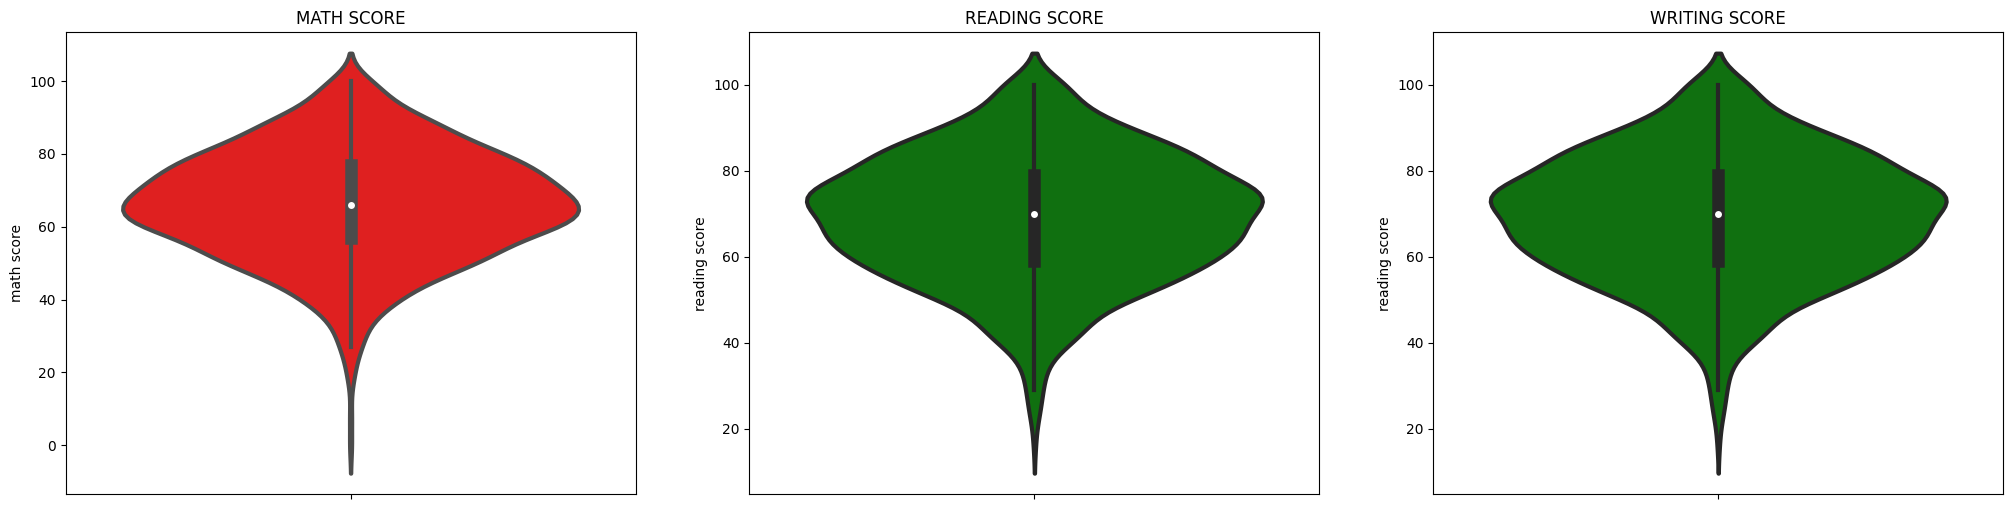

In [23]:
figs, axs = plt.subplots(1,3, figsize = (25,6))
plt.subplot(131)
plt.title("MATH SCORE")
sns.violinplot(y="math score", data=df, color="red", linewidth=3)
plt.subplot(132)
plt.title("READING SCORE")
sns.violinplot(y="reading score", data=df, color="green", linewidth=3)
plt.subplot(133)
plt.title("WRITING SCORE")
sns.violinplot(y="reading score", data=df, color="green", linewidth=3)
plt.show()

### Multivariate analysis using pieplot

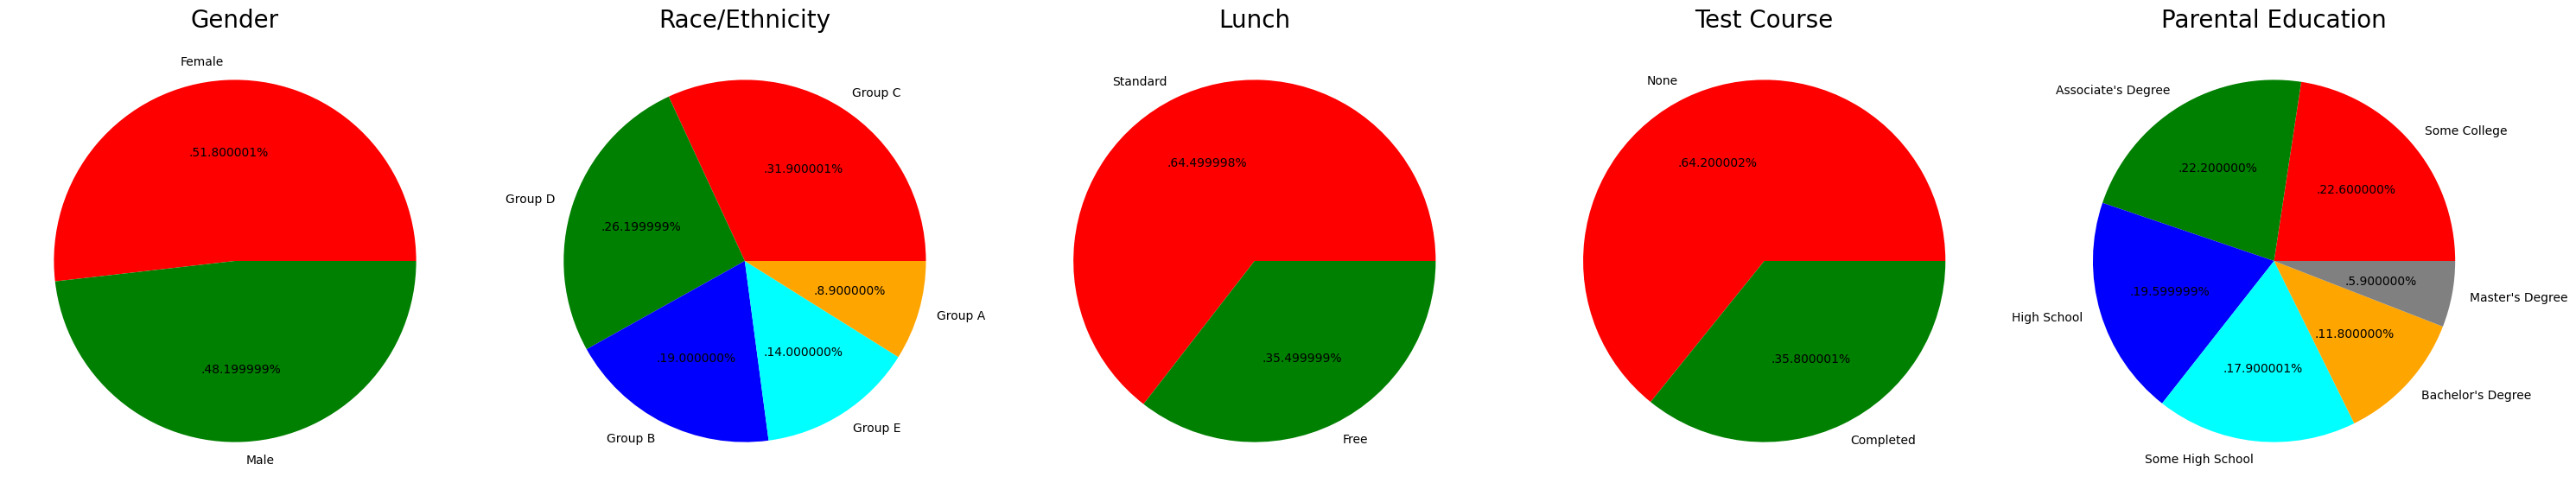

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

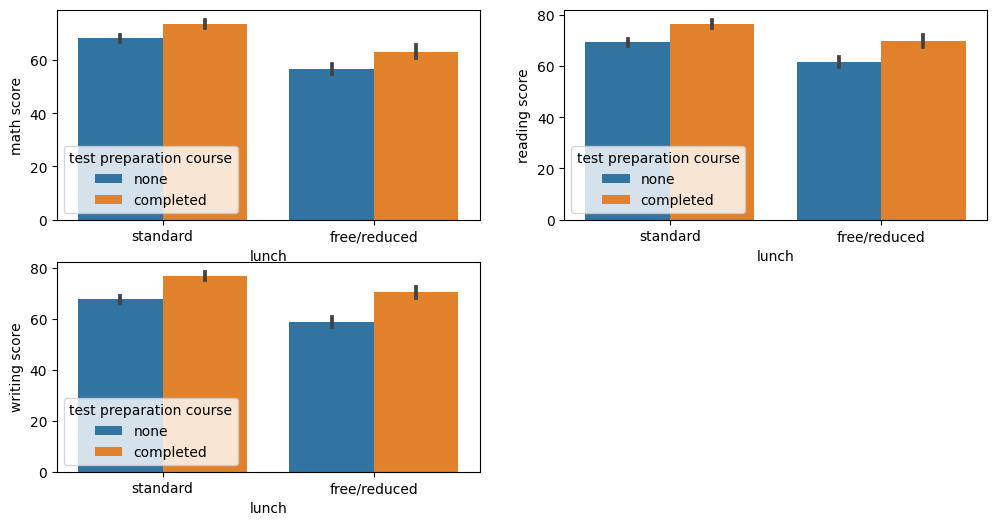

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

### Some findings:
- Females lead in pass percentage and also are top-scorers
- Finishing preparation course is benefitial
- Student's Performance is MAYBE related with lunch, race, parental level education but this cannot be true since the least performing categories have less amount of samples. Plots with percentage can help compared to plots with count.